<a href="https://colab.research.google.com/github/TamTran72111/learn-ml-dl/blob/master/Augelien_Geron_book/09_Unsupervised_Learning_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color='red'><b><h3>Clustering</h3></b></font>

**K-Means**

In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from sklearn.datasets import make_blobs

blob_centers = np.array([
  [0.2, 2.3],
  [-1.5, 2.3],
  [-2.8, 1.8],
  [-2.8, 2.8],
  [-2.8, 1.3],
])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [ ]:
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

In [ ]:
def plot_clusters(X, y=None):
  plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
  plt.xlabel('$x_1$', fontsize=14)
  plt.xlabel('$x_2$', fontsize=14, rotation=0)

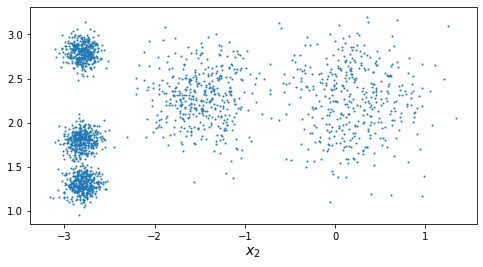

In [ ]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

In [ ]:
from sklearn.cluster import KMeans

k = 5
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

In [ ]:
y_pred is kmeans.labels_

True

In [ ]:
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-1.46679593,  2.28585348],
       [-2.79290307,  2.79641063],
       [-2.80037642,  1.30082566]])

In [ ]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 3, 3], dtype=int32)

In [ ]:
def plot_data(X):
  plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
  if weights:
    centroids = centroids[weights > weights.max() / 10]
  plt.scatter(centroids[:, 0], centroids[:, 1],
              marker='o', s=30, linewidths=8,
              color=circle_color, zorder=10, alpha=0.9)
  plt.scatter(centroids[:, 0], centroids[:, 1],
              marker='x', s=30, linewidths=50,
              color=cross_color, zorder=11, alpha=1)
  
def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabel=True, show_ylabel=True):
  mins = X.min(axis=0) - 0.1
  maxs = X.max(axis=0) + 0.1
  xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                       np.linspace(mins[1], maxs[1], resolution))
  Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
               cmap='Pastel2')
  plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
              linewidths=1, colors='k')
  plot_data(X)
  if show_centroids:
    plot_centroids(clusterer.cluster_centers_)
  if show_xlabel:
    plt.xlabel('$x_1$', fontsize=14)
  else:
    plt.tick_params(labelbottom=False)
  if show_ylabel:
    plt.ylabel('$x_2$', fontsize=14, rotation=0)
  else:
    plt.tick_params(labelleft=False)


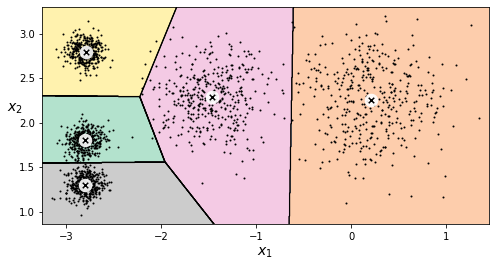

In [ ]:
plt.figure(figsize=(8, 4))
plot_decisison_boundaries(kmeans, X)
plt.show()

In [ ]:
kmeans.transform(X_new)

array([[2.81093633, 0.32995317, 1.49439034, 2.9042344 , 2.88633901],
       [5.80730058, 2.80290755, 4.4759332 , 5.84739223, 5.84236351],
       [1.21475352, 3.29399768, 1.69136631, 0.29040966, 1.71086031],
       [0.72581411, 3.21806371, 1.54808703, 0.36159148, 1.21567622]])

In [ ]:
kmeans.inertia_

211.5985372581684

In [ ]:
kmeans.score(X)

-211.59853725816856

In [ ]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
minibatch_kmeans.fit(X)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=5, n_init=3, random_state=42,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [ ]:
minibatch_kmeans.score(X)

-211.93186531476778

In [ ]:
%timeit -n 50 KMeans(algorithm='elkan').fit(X)

50 loops, best of 3: 89 ms per loop


In [ ]:
%timeit -n 50 KMeans(algorithm='full').fit(X)

50 loops, best of 3: 125 ms per loop


In [ ]:
# Handling large datasets which do not fit in memory
def load_next_batch(batch_size):
  return X[np.random.choice(len(X), batch_size, replace=False)]

In [ ]:
np.random.seed(42)

In [ ]:
k = 5
n_init = 10
n_iterations = 100
batch_size= 100
init_size = 500   # more data for K-Means++ initialization
evaluate_on_last_n_iters = 10

best_kmeans = None

for init in range(n_init):
  minibatch_kmeans = MiniBatchKMeans(n_clusters=k, init_size=init_size)
  X_init = load_next_batch(init_size)
  minibatch_kmeans.partial_fit(X_init)

  minibatch_kmeans.sum_inertia = 0
  for iteration in range(n_iterations):
    X_batch = load_next_batch(batch_size)
    minibatch_kmeans.partial_fit(X_batch)
    if iteration >= n_iterations - evaluate_on_last_n_iters:
      minibatch_kmeans.sum_inertia += minibatch_kmeans.inertia_
    
  if best_kmeans is None or minibatch_kmeans.sum_inertia < best_kmeans.sum_inertia:
    best_kmeans = minibatch_kmeans    

In [ ]:
best_kmeans.score(X)

-211.70999744411483

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_score(X, kmeans.labels_)

0.655517642572828

*Image Segmentation*

In [ ]:
# Download the ladybug image
import os, urllib

images_path = os.path.join('images', 'unsupervised_learning')
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = 'https://raw.githubusercontent.com/ageron/handson-ml2/master/'
filename = 'ladybug.png'
url = DOWNLOAD_ROOT + 'images/unsupervised_learning/' + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('images/unsupervised_learning/ladybug.png',
 <http.client.HTTPMessage at 0x7f0ae0058da0>)

In [ ]:
from matplotlib.image import imread
image = imread(os.path.join(images_path, filename))
image.shape

(533, 800, 3)

In [ ]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

In [ ]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
  kmeans = KMeans(n_clusters=n_clusters, random_state=42)
  kmeans.fit(X)
  segmented_img = kmeans.cluster_centers_[kmeans.labels_]
  segmented_imgs.append(segmented_img.reshape(image.shape))

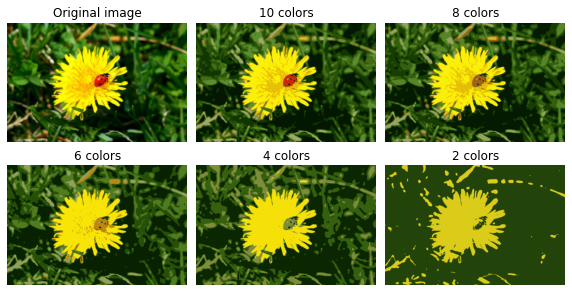

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title('Original image')
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
  plt.subplot(232 + idx)
  plt.imshow(segmented_imgs[idx])
  plt.title("{} colors".format(n_clusters))
  plt.axis("off")

plt.show()

*Preprocessing*

In [ ]:
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(multi_class='ovr', solver='lbfgs',
                             max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
log_reg.score(X_test, y_test)

0.9688888888888889

In [ ]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
  ('kmeans', KMeans(n_clusters=50, random_state=42)),
  ('log_reg', LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=5000, random_state=42))
])
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=50, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=42,
                        tol=0.0001, verbose=0)),
                ('log_reg',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=5000,
                                    multi_class='ovr', n_jobs=None,
                                    penalty='l2', random_state=42,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [ ]:
pipeline.score(X_test, y_test)

0.98

In [ ]:
# Find the best value of k
from sklearn.model_selection import GridSearchCV

param_grid = {'kmeans__n_clusters': range(2, 100)}
grid_search_cv = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits
[CV] kmeans__n_clusters=2 ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................. kmeans__n_clusters=2, total=   0.2s
[CV] kmeans__n_clusters=2 ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ............................. kmeans__n_clusters=2, total=   0.2s
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   0.2s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.3s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.3s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.3s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   0.3s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   0.3s
[CV] kmeans__n_clusters=4 ............................................
[CV] .

[Parallel(n_jobs=1)]: Done 294 out of 294 | elapsed: 26.3min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('kmeans',
                                        KMeans(algorithm='auto', copy_x=True,
                                               init='k-means++', max_iter=300,
                                               n_clusters=50, n_init=10,
                                               n_jobs=None,
                                               precompute_distances='auto',
                                               random_state=42, tol=0.0001,
                                               verbose=0)),
                                       ('log_reg',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                      

In [ ]:
grid_search_cv.best_params_

{'kmeans__n_clusters': 57}

In [ ]:
grid_search_cv.score(X_test, y_test)

0.98

*Semi-Supervised Learning*

In [ ]:
n_labeled = 50
log_reg = LogisticRegression()
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
log_reg.score(X_test, y_test)

0.8266666666666667

In [ ]:
k = 50
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

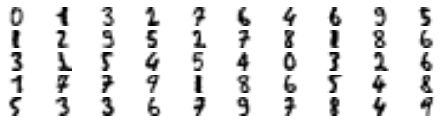

In [ ]:
# Label representative digits manually
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
  plt.subplot(k // 10, 10, index+1)
  plt.imshow(X_representative_digit.reshape(8, 8), cmap='binary', interpolation='bilinear')
  plt.axis('off')

In [ ]:
y_representative_digits = np.array([
    0, 1, 3, 2, 7, 6, 4, 6, 9, 5,
    1, 2, 9, 5, 2, 7, 8, 1, 8 ,6,
    3, 1, 5, 4, 5, 4, 0, 3, 2, 6,
    1, 7, 7, 9, 1, 8, 6, 5, 4, 8,
    5, 3, 3, 6, 7, 9, 7, 8, 4, 9
])

In [ ]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.9244444444444444

In [ ]:
# Label Propagation
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
  y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

In [ ]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

0.9377777777777778

In [ ]:
# Propagate only to the 20% of the instances that are cloest to the centroids
percentile_closest = 20
X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
  in_cluster = kmeans.labels_ == i
  cluster_dist = X_cluster_dist[in_cluster]
  cutoff_distance = np.percentile(cluster_dist, percentile_closest)
  above_cutoff = X_cluster_dist > cutoff_distance
  X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train[partially_propagated]

In [ ]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.9355555555555556

**DBSCAN**

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.05, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [ ]:
dbscan.labels_[:10]

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5])

In [ ]:
len(dbscan.core_sample_indices_)

808

In [ ]:
dbscan.core_sample_indices_[:10]

array([ 0,  4,  5,  6,  7,  8, 10, 11, 12, 13])

In [ ]:
dbscan.components_[:10,:]

array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599],
       [ 0.29248724, -0.20696309],
       [-0.02637836,  0.44766267],
       [ 1.6201408 , -0.28758856],
       [ 1.26718285, -0.40793471],
       [ 0.87418608,  0.50781041],
       [ 0.3322007 , -0.19032202],
       [ 1.952812  ,  0.22552333]])

In [ ]:
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6])

In [ ]:
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

DBSCAN(algorithm='auto', eps=0.2, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [ ]:
def plot_dbscan(dbscan, X, size, show_xlabel=True, show_ylabel=True):
  core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
  core_mask[dbscan.core_sample_indices_] = True
  anomalies_mask = dbscan.labels_ == -1
  non_core_mask = ~(core_mask | anomalies_mask)

  cores = dbscan.components_
  anomalies = X[anomalies_mask]
  non_cores = X[non_core_mask]

  plt.scatter(cores[:, 0], cores[:, 1],
              c=dbscan.labels_[core_mask], marker='o', s=size, cmap='Paired')
  plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
  plt.scatter(anomalies[:, 0], anomalies[:, 1],
              c='r', marker='x', s=100)
  plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask],
              marker='.')
  
  if show_xlabel:
    plt.xlabel('$x_1$', fontsize=14)
  else:
    plt.tick_params(labelbottom=False)
  if show_ylabel:
    plt.ylabel('$x_2$', fontsize=14, rotation=0)
  else:
    plt.tick_params(labelleft=False)
  plt.title('eps={:.2f}, min_samples={}'.format(dbscan.eps, dbscan.min_samples),
            fontsize =14)

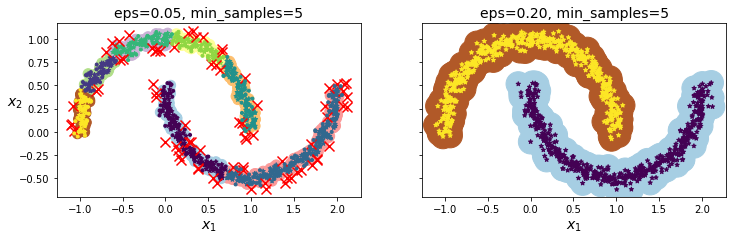

In [ ]:
plt.figure(figsize=(12, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabel=False)

plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan2.components_, dbscan2.labels_[dbscan2.core_sample_indices_])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

In [ ]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([1, 0, 1, 0])

In [ ]:
knn.predict_proba(X_new)

array([[0.18, 0.82],
       [1.  , 0.  ],
       [0.12, 0.88],
       [1.  , 0.  ]])

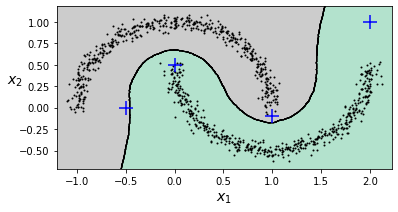

In [ ]:
plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c='b', marker='+', s=200, zorder=10)
plt.show()

In [ ]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan2.labels_[dbscan2.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  0,  1, -1])

<font color='red'><b><h3>Gaussian Mixtures</h3></b></font>

In [ ]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [ ]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=10,
                precisions_init=None, random_state=None, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [ ]:
gm.weights_

array([0.20928295, 0.39068079, 0.40003627])

In [ ]:
gm.means_

array([[ 3.40230952,  1.05802981],
       [ 0.05261352,  0.07672229],
       [-1.40756974,  1.42734898]])

In [ ]:
gm.covariances_

array([[[ 1.14337795, -0.03108819],
        [-0.03108819,  0.95393687]],

       [[ 0.69028411,  0.79813703],
        [ 0.79813703,  1.21451928]],

       [[ 0.63497215,  0.72987462],
        [ 0.72987462,  1.16086144]]])

In [ ]:
gm.converged_

True

In [ ]:
gm.n_iter_

5

In [ ]:
X_new, y_new = gm.sample(6)
X_new

array([[ 5.11231149,  0.99349544],
       [ 1.52770353,  2.33580149],
       [ 0.67343359,  1.06693185],
       [-0.16716357, -0.07267587],
       [-0.26569315, -0.88222838],
       [-2.10379522,  1.28030707]])

In [ ]:
y_new

array([0, 1, 1, 1, 1, 2])

In [ ]:
gm.score_samples(X_new)

array([-4.72380127, -3.90886363, -2.36952408, -2.02972825, -2.64817376,
       -3.00474574])

**Anomaly detection Using Gaussian Mixtures**

In [ ]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]

In [ ]:
gm.bic(X)

8189.646103381944

In [ ]:
gm.aic(X)

8102.420823266906

** Bayesian Gaussian Mixture Models**

In [ ]:
from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=10, n_init=10)
bgm.fit(X)
np.round(bgm.weights_, 2)

array([0.4 , 0.21, 0.39, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

<font color='red'><b><h3>Exercise</h3></b></font>

In [2]:
# Question 10
from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [4]:
print(olivetti.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

In [5]:
from sklearn.model_selection import StratifiedShuffleSplit

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=42)
train_valid_idx, test_idx = next(strat_split.split(olivetti.data, olivetti.target))
X_train_valid = olivetti.data[train_valid_idx]
y_train_valid = olivetti.target[train_valid_idx]
X_test = olivetti.data[test_idx]
y_test = olivetti.target[test_idx]

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=80, random_state=42)
train_idx, valid_idx = next(strat_split.split(X_train_valid, y_train_valid))
X_train = X_train_valid[train_idx]
y_train = y_train_valid[train_idx]
X_valid = X_train_valid[valid_idx]
y_valid = y_train_valid[valid_idx]

In [7]:
# Reduce dimensionality to speed up
from sklearn.decomposition import PCA

pca = PCA(0.99)
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_valid)
X_test_pca = pca.transform(X_test)

pca.n_components_

200

In [8]:
from sklearn.cluster import KMeans

k_range = range(5, 150, 5)
kmeans_per_k = []
for k in k_range:
  kmeans = KMeans(n_clusters=k, random_state=42).fit(X_train_pca)
  kmeans_per_k.append(kmeans)

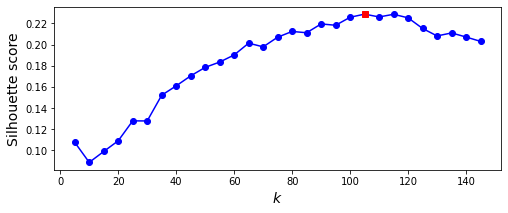

In [9]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X_train_pca, model.labels_)
                    for model in kmeans_per_k]

best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]
best_score = silhouette_scores[best_index]

plt.figure(figsize=(8, 3))
plt.plot(k_range, silhouette_scores, 'bo-')
plt.xlabel('$k$', fontsize=14)
plt.ylabel('Silhouette score', fontsize=14)
plt.plot(best_k, best_score, 'rs')
plt.show()

In [10]:
best_k

105

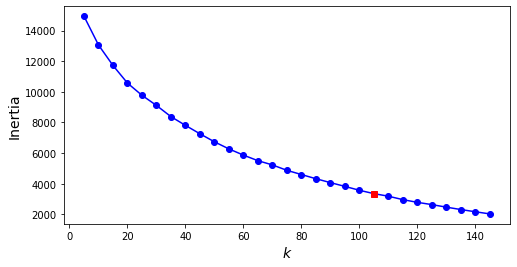

In [12]:
inertias = [model.inertia_ for model in kmeans_per_k]
best_inertia = inertias[best_index]

plt.figure(figsize=(8, 4))
plt.plot(k_range, inertias, 'bo-')
plt.xlabel('$k$', fontsize=14)
plt.ylabel('Inertia', fontsize=14)
plt.plot(best_k, best_inertia, 'rs')
plt.show()

In [13]:
best_model = kmeans_per_k[best_index]

Cluster 0


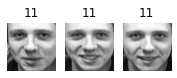

Cluster 1


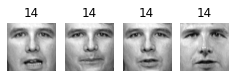

Cluster 2


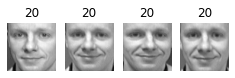

Cluster 3


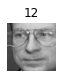

Cluster 4


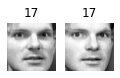

Cluster 5


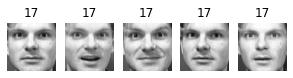

Cluster 6


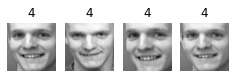

Cluster 7


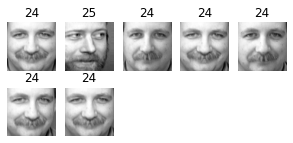

Cluster 8


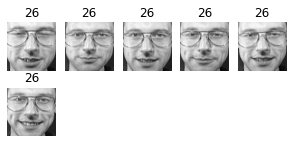

Cluster 9


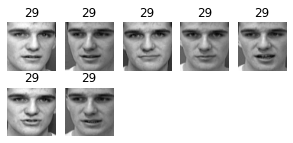

Cluster 10


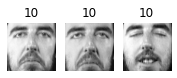

Cluster 11


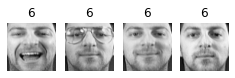

Cluster 12


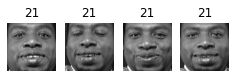

Cluster 13


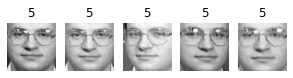

Cluster 14


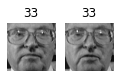

Cluster 15


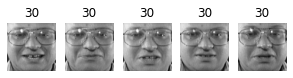

Cluster 16


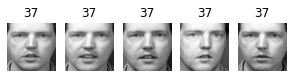

Cluster 17


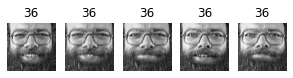

Cluster 18


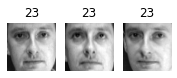

Cluster 19


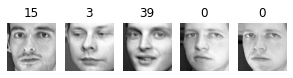

Cluster 20


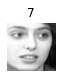

Cluster 21


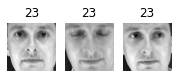

Cluster 22


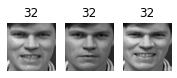

Cluster 23


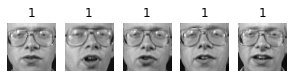

Cluster 24


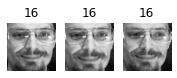

Cluster 25


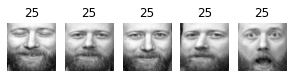

Cluster 26


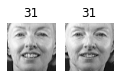

Cluster 27


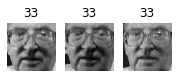

Cluster 28


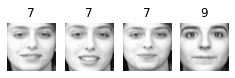

Cluster 29


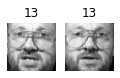

Cluster 30


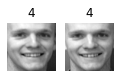

Cluster 31


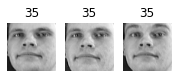

Cluster 32


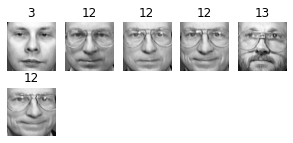

Cluster 33


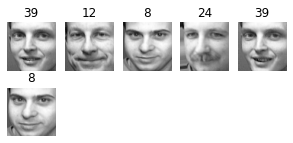

Cluster 34


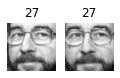

Cluster 35


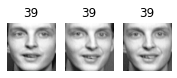

Cluster 36


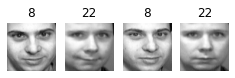

Cluster 37


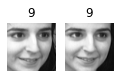

Cluster 38


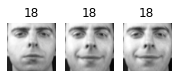

Cluster 39


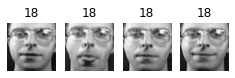

Cluster 40


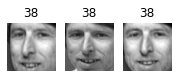

Cluster 41


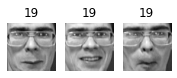

Cluster 42


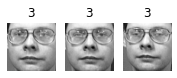

Cluster 43


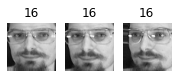

Cluster 44


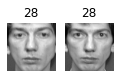

Cluster 45


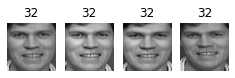

Cluster 46


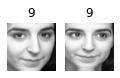

Cluster 47


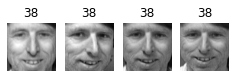

Cluster 48


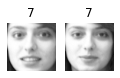

Cluster 49


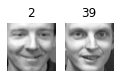

Cluster 50


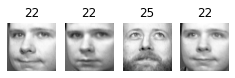

Cluster 51


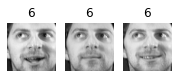

Cluster 52


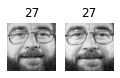

Cluster 53


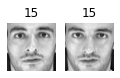

Cluster 54


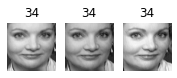

Cluster 55


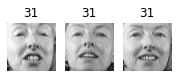

Cluster 56


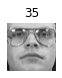

Cluster 57


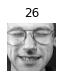

Cluster 58


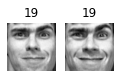

Cluster 59


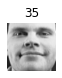

Cluster 60


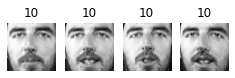

Cluster 61


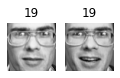

Cluster 62


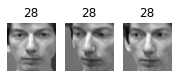

Cluster 63


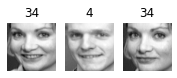

Cluster 64


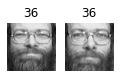

Cluster 65


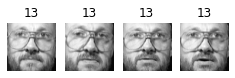

Cluster 66


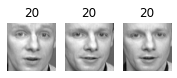

Cluster 67


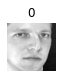

Cluster 68


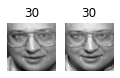

Cluster 69


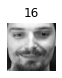

Cluster 70


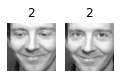

Cluster 71


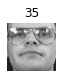

Cluster 72


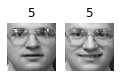

Cluster 73


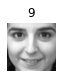

Cluster 74


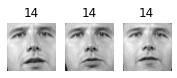

Cluster 75


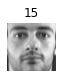

Cluster 76


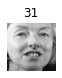

Cluster 77


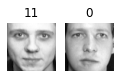

Cluster 78


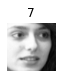

Cluster 79


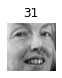

Cluster 80


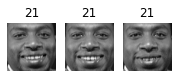

Cluster 81


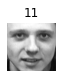

Cluster 82


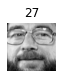

Cluster 83


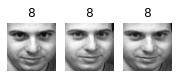

Cluster 84


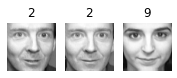

Cluster 85


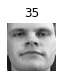

Cluster 86


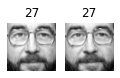

Cluster 87


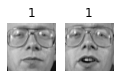

Cluster 88


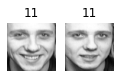

Cluster 89


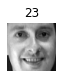

Cluster 90


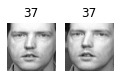

Cluster 91


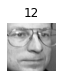

Cluster 92


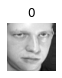

Cluster 93


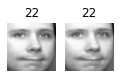

Cluster 94


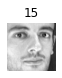

Cluster 95


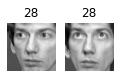

Cluster 96


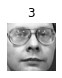

Cluster 97


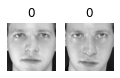

Cluster 98


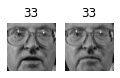

Cluster 99


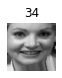

Cluster 100


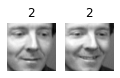

Cluster 101


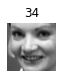

Cluster 102


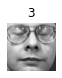

Cluster 103


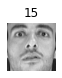

Cluster 104


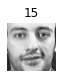

In [15]:
def plot_faces(faces, labels, n_cols=5):
  n_rows = (len(faces) - 1) // n_cols + 1
  plt.figure(figsize=(n_cols, n_rows * 1.1))
  for index, (face, label) in enumerate(zip(faces, labels)):
    plt.subplot(n_rows, n_cols, index+1)
    plt.imshow(face.reshape(64, 64), cmap='gray')
    plt.axis('off')
    plt.title(label)
  plt.show()

for cluster_id in np.unique(best_model.labels_):
  print('Cluster', cluster_id)
  in_cluster = best_model.labels_ == cluster_id
  faces = X_train[in_cluster].reshape(-1, 64, 64)
  labels = y_train[in_cluster]
  plot_faces(faces, labels)

In [17]:
# Question 11
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=150, random_state=42)
rnd_clf.fit(X_train_pca, y_train)
rnd_clf.score(X_valid_pca, y_valid)

0.9

In [19]:
X_train_reduced = best_model.transform(X_train_pca)
X_valid_reduced = best_model.transform(X_valid_pca)
X_test_reduced = best_model.transform(X_test_pca)

rnd_clf = RandomForestClassifier(n_estimators=150, random_state=42)
rnd_clf.fit(X_train_reduced, y_train)

rnd_clf.score(X_valid_reduced, y_valid)

0.75

In [20]:
from sklearn.pipeline import Pipeline

for n_clusters in k_range:
  pipeline = Pipeline([
      ('kmeans', KMeans(n_clusters=n_clusters, random_state=42)),
      ('forest_clf', RandomForestClassifier(n_estimators=150, random_state=42))
  ])
  pipeline.fit(X_train_pca, y_train)
  print(n_clusters, pipeline.score(X_valid_pca, y_valid))

5 0.4625
10 0.4125
15 0.5125
20 0.5375
25 0.6
30 0.6625
35 0.7125
40 0.6875
45 0.7
50 0.675
55 0.6875
60 0.7125
65 0.7125
70 0.7125
75 0.675
80 0.7375
85 0.7125
90 0.7375
95 0.7125
100 0.725
105 0.75
110 0.725
115 0.7125
120 0.725
125 0.7375
130 0.7375
135 0.725
140 0.7125
145 0.725


In [21]:
# Question 12
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=40, random_state=42)
y_pred = gm.fit_predict(X_train_pca)

In [23]:
n_gen_faces = 20
gen_faces_reduced, y_gen_faces = gm.sample(n_samples=n_gen_faces)
gen_faces = pca.inverse_transform(gen_faces_reduced)

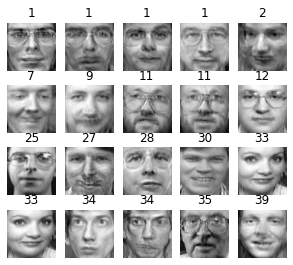

In [24]:
plot_faces(gen_faces, y_gen_faces)

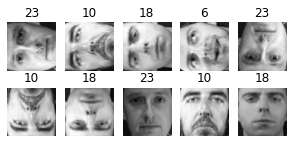

In [25]:
n_rotated = 4
rotated = np.transpose(X_train[:n_rotated].reshape(-1, 64, 64), axes=[0, 2, 1])
rotated = rotated.reshape(-1, 64*64)
y_rotated = y_train[:n_rotated]

n_flipped = 3
flipped = X_train[:n_flipped].reshape(-1, 64, 64)[:, ::-1]
flipped = flipped.reshape(-1, 64*64)
y_flipped = y_train[:n_flipped]

n_darkened = 3
darkened = X_train[:n_darkened].copy()
darkened[:, 1:-1] *=0.3
darkened = darkened.reshape(-1, 64*64)
y_darkened = y_train[:n_darkened]

X_bad_faces = np.r_[rotated, flipped, darkened]
y_bad_faces = np.concatenate([y_rotated, y_flipped, y_darkened])

plot_faces(X_bad_faces, y_bad_faces)

In [26]:
X_bad_faces_pca = pca.transform(X_bad_faces)

In [27]:
gm.score_samples(X_bad_faces_pca)

array([-5.00461251e+07, -3.43436633e+07, -3.46924359e+07, -4.30345852e+07,
       -3.21480309e+07, -4.40346634e+07, -3.77417766e+07, -1.17149344e+08,
       -8.20052310e+07, -8.38610704e+07])